<a href="https://colab.research.google.com/github/96harsh52/Bank_name_identification/blob/main/Bank_1st_Release.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cfrom google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/data1/'
valid_path = '/content/drive/My Drive/data set/'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [4], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/My Drive/data1/*')

In [ ]:
folders

['/content/drive/My Drive/data1/psb bank',
 '/content/drive/My Drive/data1/RLB bank',
 '/content/drive/My Drive/data1/saraswat bank',
 '/content/drive/My Drive/data1/sbi bank logo',
 '/content/drive/My Drive/data1/Axis bank logo',
 '/content/drive/My Drive/data1/babdhan bank logo',
 '/content/drive/My Drive/data1/bank of baroda bank logo',
 '/content/drive/My Drive/data1/bank of maharashtra bank logo',
 '/content/drive/My Drive/data1/Hdfc bank logo',
 '/content/drive/My Drive/data1/IDBI bank logo',
 '/content/drive/My Drive/data1/ICICi bank logo',
 '/content/drive/My Drive/data1/IDFC bank logo',
 '/content/drive/My Drive/data1/indian overseas bank logo',
 '/content/drive/My Drive/data1/karnataka bank logo',
 '/content/drive/My Drive/data1/karur vyasa bank logo',
 '/content/drive/My Drive/data1/kotak bank logo',
 '/content/drive/My Drive/data1/oriental bank logo',
 '/content/drive/My Drive/data1/pnb logo',
 '/content/drive/My Drive/data1/syndicate bank',
 '/content/drive/My Drive/data1/

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)


In [ ]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,
                                   zoom_range=0.2, 
                                  vertical_flip=True,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255,vertical_flip=True,
                                   horizontal_flip = True)

In [ ]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/data1/',
                                                 target_size = (224, 224),
                                                 batch_size = 15,
                                                 class_mode = 'categorical',save_format='jpg')

Found 1384 images belonging to 25 classes.


In [ ]:

test_set = test_datagen.flow_from_directory( '/content/drive/My Drive/data set/',
                                            target_size = (224, 224),
                                                 batch_size = 15,
                                                 class_mode = 'categorical',save_format='jpg')

Found 333 images belonging to 25 classes.


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=25,
  validation_steps=25
)

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
25/25 [==============================] - 333s 13s/step - loss: 16.6584 - accuracy: 0.1099 - val_loss: 18.0402 - val_accuracy: 0.0811
Epoch 2/50
25/25 [==============================] - 138s 6s/step - loss: 8.0928 - accuracy: 0.1973 - val_loss: 10.6098 - val_accuracy: 0.0240
Epoch 3/50
25/25 [==============================] - 97s 4s/step - loss: 5.0918 - accuracy: 0.2453 - val_loss: 8.9963 - val_accuracy: 0.0210
Epoch 4/50
25/25 [==============================] - 74s 3s/step - loss: 4.9395 - accuracy: 0.2907 - val_loss: 7.8957 - val_accuracy: 0.0511
Epoch 5/50
25/25 [==============================] - 55s 2s/step - loss: 4.8896 - accuracy: 0.2720 - val_loss: 9.0176 - val_accuracy: 0.0270
Epoch 6/50
25/25 [==============================] - 37s 1s/step - loss: 5.1807 - accuracy: 0.2933 - val_loss: 9.5363 - val_accuracy: 0.0210
Epoch 7/50
25/25 [==============================] - 31s 1s/step - loss: 5.2305 - accuracy: 0.2907 - val_loss: 8.1093 - val_accuracy: 0.0541
Epoch 8/50
25/

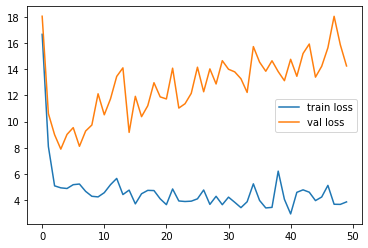

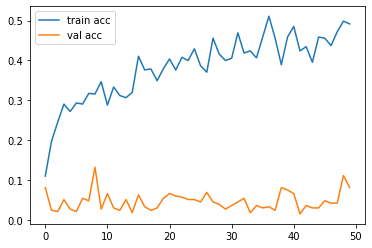

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras
import h5py

t=model.save('model_resnet50.h5')

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('model_resnet50.h5')

img = cv2.imread('/content/drive/My Drive/img0.png')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = np.(img)
print(classes)
print("actually=1")

0
actually=1


In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('model_resnet50.h5')

img = cv2.imread('/content/drive/My Drive/img0.png')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = np.argmax(img)
print(classes)
print("actually=1")

0
actually=1


In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('model_resnet50.h5')

img = cv2.imread('/content/drive/My Drive/bb_08.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = np.argmax(img)
print(classes)
print("actually=1")


from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('model_resnet50.h5')

img = cv2.imread('/content/drive/My Drive/Axis bank_20.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = .predict_classes(img)
print(classes)
print("actully=1")
# np.argmax(classes)

2
actually=1


AttributeError: ignored